In [1]:
## SMV

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

%matplotlib inline

In [2]:
df1 = pd.read_csv('C:/Users/Can/Desktop/abc2.csv')


In [3]:
df1.columns

Index(['homewin', 'winlarge', 'over2', 's', 'lig', 'r', 'iy/h', 'ms/h', 'ht',
       'at', 'emp', 'emp2', 'code1', 'ms1', 'ms0', 'ms2', 'code2', 'han1',
       'han0', 'han2', 'code3', 'firstgoal1', 'firstgoal0', 'firstgoal2',
       'code4', 'Ev/A', 'B/A', 'D/A', 'Ev/U', 'B/U', 'D/U', 'code5', 'U', 'O',
       'code6', '35u', '35o', 'Unnamed: 37', 'code7', 'g', 'ng', 'code8',
       '0-1', '43526', '43589', '6+', 'code0', 'half1', 'half0', 'half2',
       'code11', '1halfu', '1halfo', 'code12', '43466', '1/0', '43497', '0/1',
       '0/0', '0/2', '43467', '2/0', '43498'],
      dtype='object')

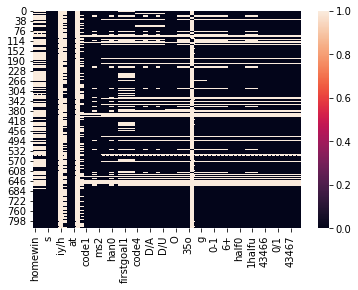

In [4]:
sns.heatmap(df1.isnull())


In [5]:
df2 = df1.drop(['s', 'lig', 'r','iy/h', 'ms/h','emp', 'emp2','code1','code2', 'code3','code4','code5','code6','code8'
               ,'code0','code11','code12','Unnamed: 37'],axis=1)
df2.dropna(subset=['homewin'],axis=0,inplace=True)
df2.dropna(axis=0,inplace=True)
df2.head()

,homewin,winlarge,over2,ht,at,ms1,ms0,ms2,han1,han0,...,1halfo,43466,1/0,43497,0/1,0/0,0/2,43467,2/0,43498
0,1.0,0.0,0.0,Melbourne V,Perth Glory,2.45,3.0,2.2,1.30,3.6,...,2.25,3.75,10.0,20.0,5.25,4.50,4.75,20.0,10.0,3.25
8,1.0,0.0,0.0,A. Giurgiu,Gaz Metan,2.05,2.8,2.8,3.75,3.3,...,2.65,3.20,10.0,25.0,4.25,3.90,5.25,20.0,12.0,4.60
13,1.0,0.0,0.0,Z Sosnowiec,Nieciecza,2.25,2.9,2.45,4.00,3.5,...,2.40,3.40,10.0,22.0,4.60,4.25,5.00,20.0,10.0,3.75
14,1.0,1.0,0.0,Zaglebie Lubin,Gornik Zabrze,1.7,3.1,3.3,2.80,3.3,...,2.25,2.40,10.0,25.0,3.90,4.60,6.75,17.0,12.0,5.25
15,0.0,0.0,1.0,SC Covilha,CD Feirense,2.15,2.8,2.65,3.90,3.4,...,2.55,3.25,10.0,22.0,4.40,3.90,5.25,20.0,10.0,4.25


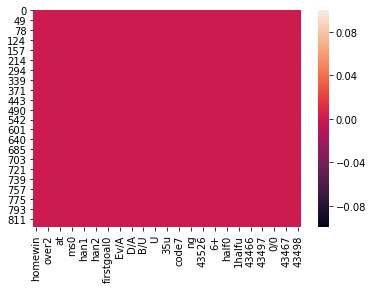

In [6]:
sns.heatmap(df2.isnull())

In [7]:
from sklearn.model_selection import train_test_split
X= df2.drop(labels=['homewin','over2','winlarge','ht','at'],axis=1)
y = df2['homewin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
from sklearn.svm import SVC

In [9]:
model1 = SVC()
model1.fit(X_train,y_train)

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [10]:
from sklearn.metrics import classification_report,confusion_matrix

prediction = model1.predict(X_test)
print(classification_report(y_test,prediction))
print(confusion_matrix(y_test,prediction))

              precision    recall  f1-score   support

         0.0       0.49      1.00      0.66        64
         1.0       0.00      0.00      0.00        67

   micro avg       0.49      0.49      0.49       131
   macro avg       0.24      0.50      0.33       131
weighted avg       0.24      0.49      0.32       131

[[64  0]
 [67  0]]


C:\Users\Can\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [11]:
parem_grid = {'C': [0.1,1, 10, 100,1000,10000,100000], 'gamma': [1,0.1,0.01,0.001,0.0001,0.00001,0.000001]} 

In [12]:
parem_grid

{'C': [0.1, 1, 10, 100, 1000, 10000, 100000],
 'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06]}

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
model2 =GridSearchCV(SVC(),parem_grid,refit=True,verbose=2)

In [15]:
model2.fit(X_train,y_train)
grid_pred = model2.predict(X_test)

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 49 candidates, totalling 147 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ..........

[CV] ................................... C=100, gamma=1, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] ................................. C=100, gamma=0.1, total=   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] ................................. C=100, gamma=0.1, total=   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] ................................. C=100, gamma=0.1, total=   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] ................................ C=100, gamma=0.01, total=   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] .

[CV] ............................. C=10000, gamma=1e-06, total=   0.0s
[CV] C=10000, gamma=1e-06 ............................................
[CV] ............................. C=10000, gamma=1e-06, total=   0.0s
[CV] C=10000, gamma=1e-06 ............................................
[CV] ............................. C=10000, gamma=1e-06, total=   0.0s
[CV] C=100000, gamma=1 ...............................................
[CV] ................................ C=100000, gamma=1, total=   0.0s
[CV] C=100000, gamma=1 ...............................................
[CV] ................................ C=100000, gamma=1, total=   0.0s
[CV] C=100000, gamma=1 ...............................................
[CV] ................................ C=100000, gamma=1, total=   0.0s
[CV] C=100000, gamma=0.1 .............................................
[CV] .............................. C=100000, gamma=0.1, total=   0.0s
[CV] C=100000, gamma=0.1 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done 147 out of 147 | elapsed:    3.7s finished
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [16]:
print(classification_report(y_test,grid_pred))
print(confusion_matrix(y_test,grid_pred))

              precision    recall  f1-score   support

         0.0       0.48      0.69      0.56        64
         1.0       0.49      0.28      0.36        67

   micro avg       0.48      0.48      0.48       131
   macro avg       0.48      0.49      0.46       131
weighted avg       0.48      0.48      0.46       131

[[44 20]
 [48 19]]


In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 826
Data columns (total 45 columns):
homewin       394 non-null float64
winlarge      394 non-null float64
over2         394 non-null float64
ht            394 non-null object
at            394 non-null object
ms1           394 non-null object
ms0           394 non-null float64
ms2           394 non-null object
han1          394 non-null float64
han0          394 non-null float64
han2          394 non-null float64
firstgoal1    394 non-null float64
firstgoal0    394 non-null float64
firstgoal2    394 non-null float64
Ev/A          394 non-null float64
B/A           394 non-null float64
D/A           394 non-null float64
Ev/U          394 non-null float64
B/U           394 non-null float64
D/U           394 non-null float64
U             394 non-null float64
O             394 non-null float64
35u           394 non-null float64
35o           394 non-null float64
code7         394 non-null float64
g             394 non-nu

In [18]:
df2["ms2"] = df2.ms2.convert_objects(convert_numeric=True)
df2["ms1"] = df2.ms1.convert_objects(convert_numeric=True)
df2.drop(labels=['ht','at'],axis=1,inplace=True)

C:\Users\Can\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.
C:\Users\Can\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 826
Data columns (total 43 columns):
homewin       394 non-null float64
winlarge      394 non-null float64
over2         394 non-null float64
ms1           394 non-null float64
ms0           394 non-null float64
ms2           394 non-null float64
han1          394 non-null float64
han0          394 non-null float64
han2          394 non-null float64
firstgoal1    394 non-null float64
firstgoal0    394 non-null float64
firstgoal2    394 non-null float64
Ev/A          394 non-null float64
B/A           394 non-null float64
D/A           394 non-null float64
Ev/U          394 non-null float64
B/U           394 non-null float64
D/U           394 non-null float64
U             394 non-null float64
O             394 non-null float64
35u           394 non-null float64
35o           394 non-null float64
code7         394 non-null float64
g             394 non-null float64
ng            394 non-null float64
0-1           394 no

In [20]:
#df3 = df2.iloc[:,0:7]
#sns.pairplot(df3,hue='homewin')

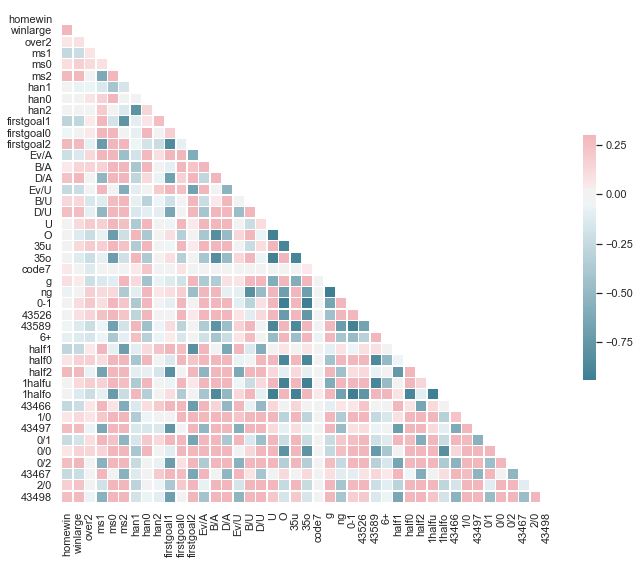

In [22]:
sns.set(style="white")


# Compute the correlation matrix
corr = df2.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
     linewidths=.5, cbar_kws={"shrink": .5})

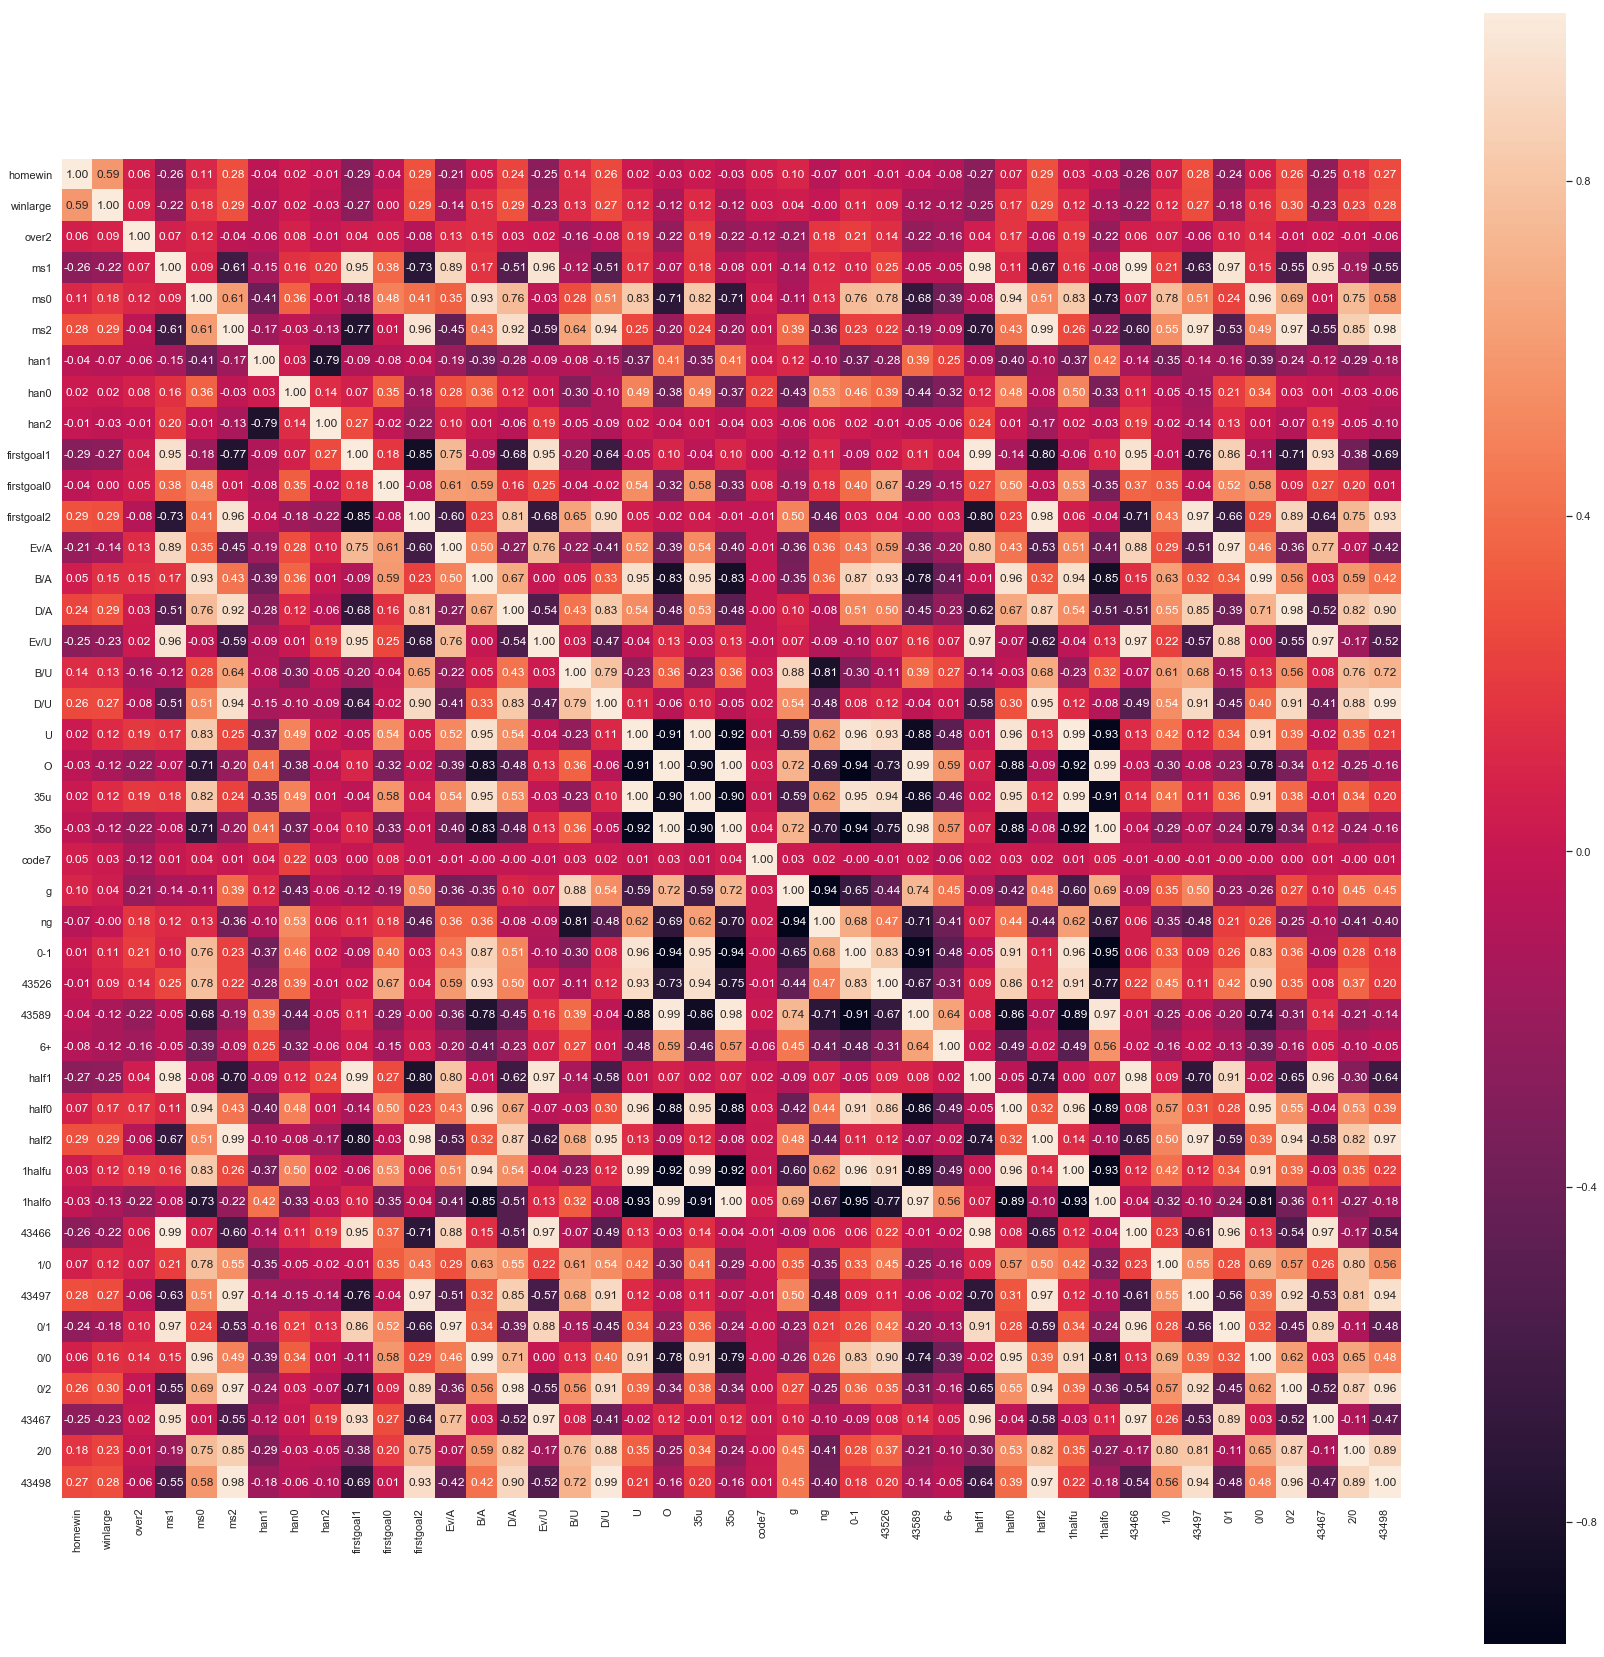

In [23]:
plt.figure(figsize=(30,30))
corelation = df2.corr()
sns.set(font_scale=1)
heatmap = sns.heatmap (corelation, cbar = True,annot = True,square = True, fmt=".2f")
plt.show()

In [49]:
df3= df2.drop(labels=['winlarge','over2','ms0','han1','g','ng','half0','1/0','6+','han0','han2','firstgoal0','B/A','U','O','35u','35o','code7','0-1','43589','43526','1halfu','1halfo','0/0'],axis=1)

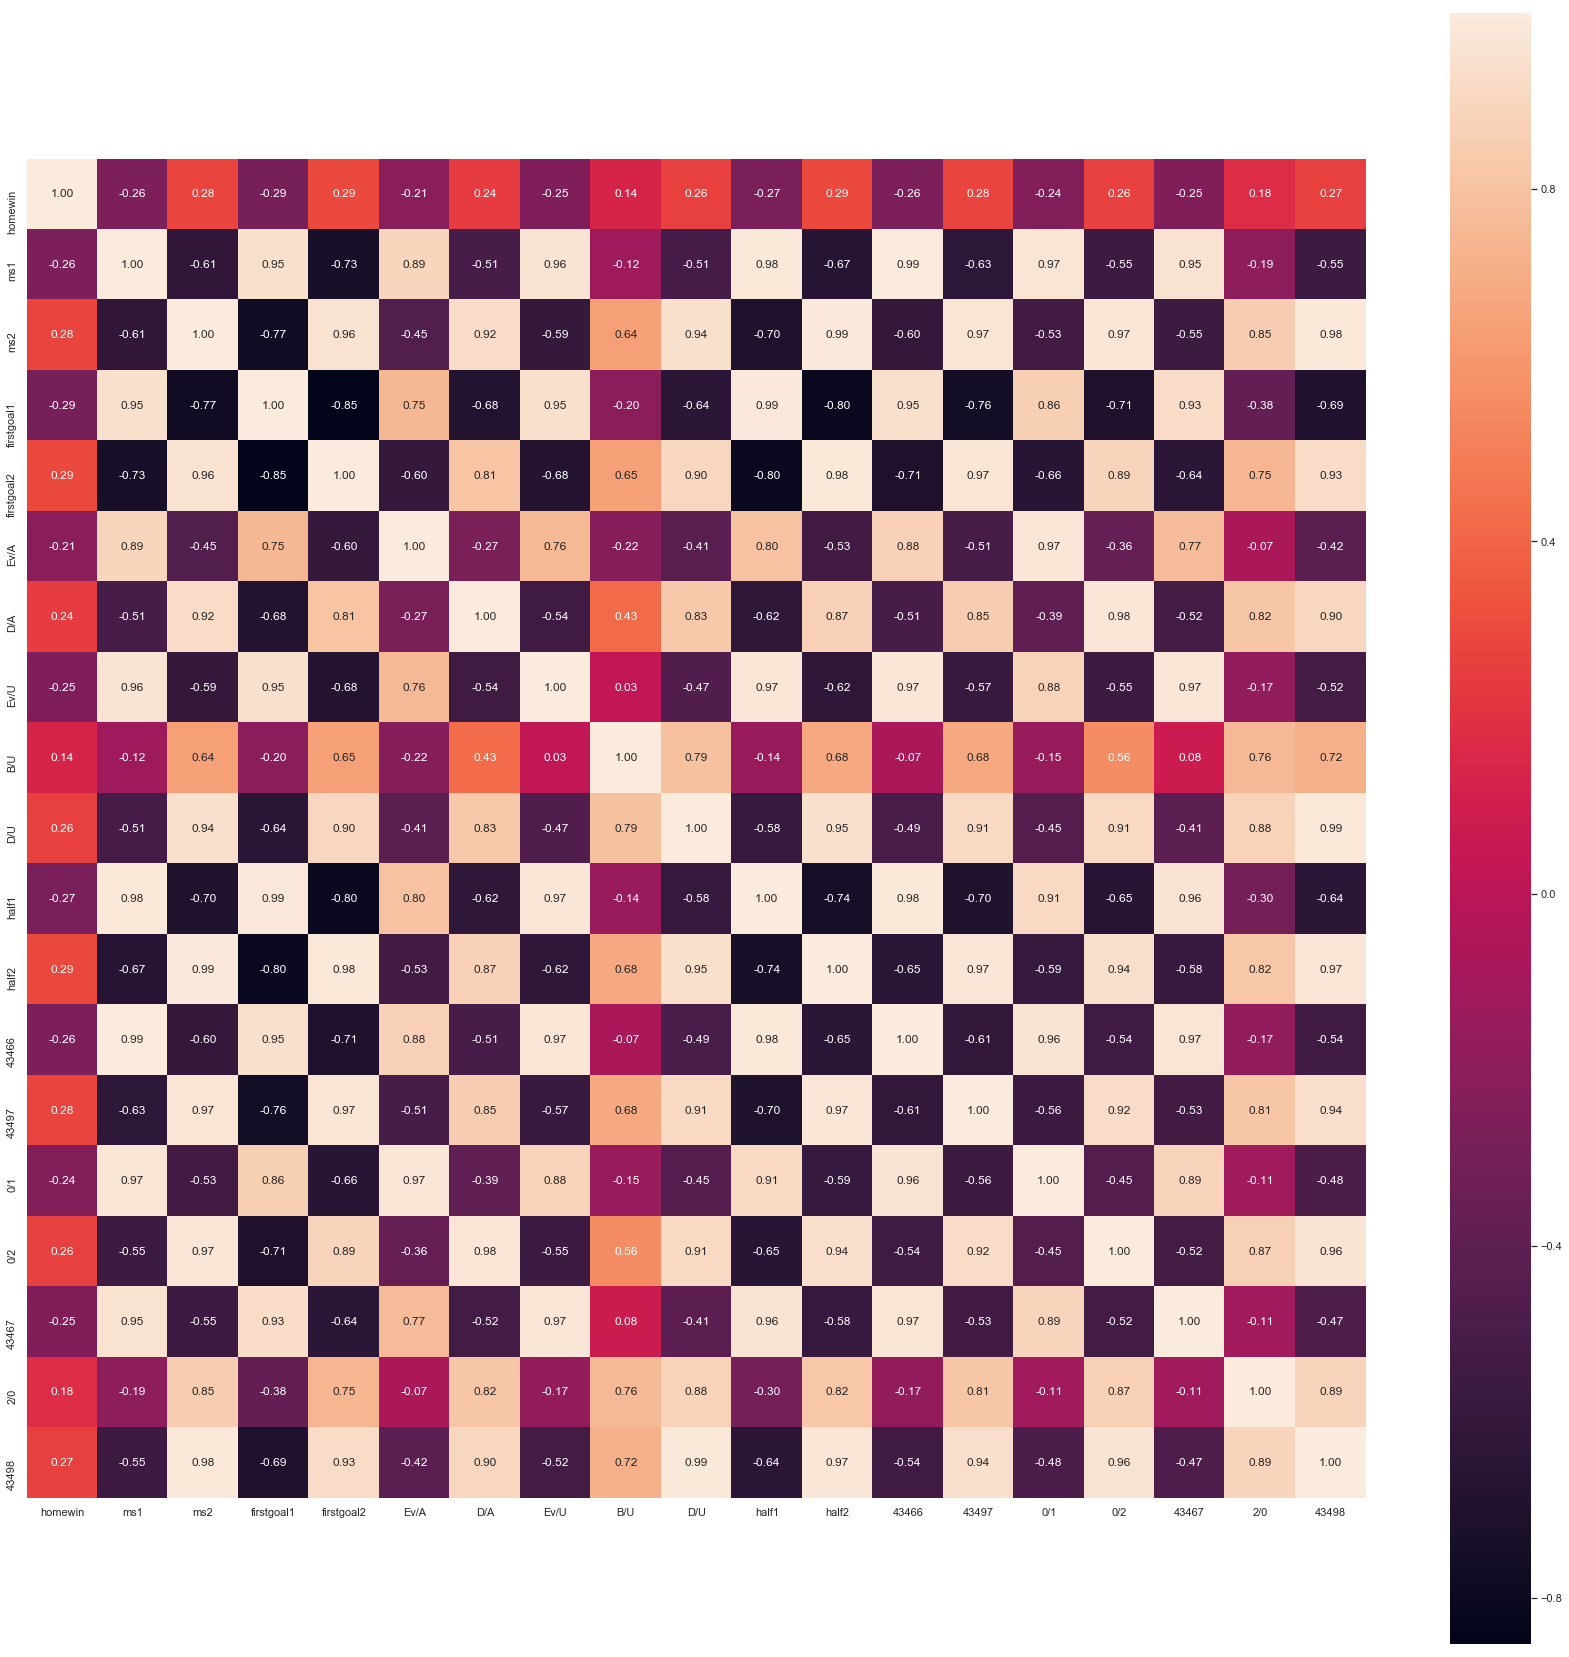

In [50]:
plt.figure(figsize=(30,30))
corelation = df3.corr()
sns.set(font_scale=1)
heatmap = sns.heatmap (corelation, cbar = True,annot = True,square = True, fmt=".2f")
plt.show()

In [51]:
X2= df3.drop('homewin',axis=1)
y2 =df3['homewin']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, random_state=15)
model2= SVC()
model2.fit(X2_train,y2_train)


C:\Users\Can\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [52]:
prediction3 = model2.predict(X2_test)

In [53]:
print(classification_report(y2_test,prediction3))

              precision    recall  f1-score   support

         0.0       0.52      0.88      0.65        50
         1.0       0.57      0.16      0.25        49

   micro avg       0.53      0.53      0.53        99
   macro avg       0.54      0.52      0.45        99
weighted avg       0.54      0.53      0.45        99



In [54]:
model3 = GridSearchCV(SVC(),parem_grid,refit=True,verbose=2)

In [55]:
model3.fit(X2_train,y2_train)

C:\Users\Can\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 49 candidates, totalling 147 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ..........

[CV] ................................ C=100, gamma=0.01, total=   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] ................................ C=100, gamma=0.01, total=   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] ................................ C=100, gamma=0.01, total=   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] ............................... C=100, gamma=0.001, total=   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] ............................... C=100, gamma=0.001, total=   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] ............................... C=100, gamma=0.001, total=   0.0s
[CV] C=100, gamma=0.0001 .............................................
[CV] .............................. C=100, gamma=0.0001, total=   0.0s
[CV] C=100, gamma=0.0001 .............................................
[CV] .

[CV] ............................. C=100000, gamma=0.01, total=   0.0s
[CV] C=100000, gamma=0.01 ............................................
[CV] ............................. C=100000, gamma=0.01, total=   0.0s
[CV] C=100000, gamma=0.01 ............................................
[CV] ............................. C=100000, gamma=0.01, total=   0.0s
[CV] C=100000, gamma=0.001 ...........................................
[CV] ............................ C=100000, gamma=0.001, total=   0.4s
[CV] C=100000, gamma=0.001 ...........................................
[CV] ............................ C=100000, gamma=0.001, total=   0.7s
[CV] C=100000, gamma=0.001 ...........................................
[CV] ............................ C=100000, gamma=0.001, total=   0.4s
[CV] C=100000, gamma=0.0001 ..........................................
[CV] ........................... C=100000, gamma=0.0001, total=   0.0s
[CV] C=100000, gamma=0.0001 ..........................................
[CV] .

[Parallel(n_jobs=1)]: Done 147 out of 147 | elapsed:    4.0s finished
C:\Users\Can\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100, 1000, 10000, 100000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [66]:
prediction4 = model3.predict(X2_test)

In [67]:
print(classification_report(y2_test,prediction4))

              precision    recall  f1-score   support

         0.0       0.53      0.88      0.66        50
         1.0       0.62      0.20      0.31        49

   micro avg       0.55      0.55      0.55        99
   macro avg       0.58      0.54      0.48        99
weighted avg       0.58      0.55      0.49        99



In [86]:
df4=df2.drop(labels=['homewin','winlarge','over2','ms0','han1','g','ng','half0','1/0','6+','han0','han2','firstgoal0','B/A','U','O','35u','35o','code7','0-1','43589','43526','1halfu','1halfo','0/0'],axis=1)
prediction5=model3.predict(df4)
df4.columns

Index(['ms1', 'ms2', 'firstgoal1', 'firstgoal2', 'Ev/A', 'D/A', 'Ev/U', 'B/U',
       'D/U', 'half1', 'half2', '43466', '43497', '0/1', '0/2', '43467', '2/0',
       '43498'],
      dtype='object')

In [80]:
df5=pd.DataFrame(columns=['ht','at','ms1','pred'])
df5['ms1'] = df2['ms1']
df5['pred'] = prediction5

C:\Users\Can\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
C:\Users\Can\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until


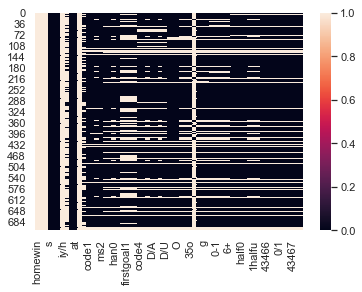

In [90]:
test_data =pd.read_csv('C:/Users/Can/Desktop/test.csv')
test_data['ms1']=test_data.ms1.convert_objects(convert_numeric=True)
test_data['ms2']=test_data.ms1.convert_objects(convert_numeric=True)
#test_data.info()

sns.heatmap(test_data.isnull())

In [94]:
df6 = test_data[['ms1', 'ms2', 'firstgoal1', 'firstgoal2', 'Ev/A', 'D/A', 'Ev/U', 'B/U',
       'D/U', 'half1', 'half2', '43466', '43497', '0/1', '0/2', '43467', '2/0',
       '43498']].dropna()
df7 = test_data[['ht','at','ms1', 'ms2', 'firstgoal1', 'firstgoal2', 'Ev/A', 'D/A', 'Ev/U', 'B/U',
       'D/U', 'half1', 'half2', '43466', '43497', '0/1', '0/2', '43467', '2/0',
       '43498']].dropna()

In [92]:
pred_new = model3.predict(df6)

In [93]:
pred_new

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 0.

In [96]:
df7['pred'] =pred_new

In [103]:
df9 = df7[['ht','at','ms1','pred']]
df8 = df9[df9['pred']==1]
df8.sort_values(['ms1'],ascending=1)

,ht,at,ms1,pred
27,Saarbrucken,Balingen,1.05,1.0
629,Olympiacos,Panaitolikos,1.05,1.0
348,Paris Saint Germain,Dijon,1.08,1.0
700,Benfica,Moreirense,1.12,1.0
628,Ofi Crete,Lamia,1.12,1.0
71,SC Cambuur,Jong PSV,1.12,1.0
332,Fehervar,Kaposvari R,1.15,1.0
342,Sparta Prag,Fastav Zlin,1.15,1.0
219,B. Dortmund,Freiburg,1.15,1.0
582,LASK,Hartberg,1.18,1.0


In [104]:
df8.to_csv('c:/ML/alltest3.csv')